In [8]:
import os
import paddlehub as hub
from PIL import Image
import numpy as np
humanseg = hub.Module(name='deeplabv3p_xception65_humanseg')



[2020-09-21 16:36:36,461] [    INFO] - Installing deeplabv3p_xception65_humanseg module
[2020-09-21 16:36:36,464] [    INFO] - Module deeplabv3p_xception65_humanseg already installed in C:\Users\zikep\.paddlehub\modules\deeplabv3p_xception65_humanseg


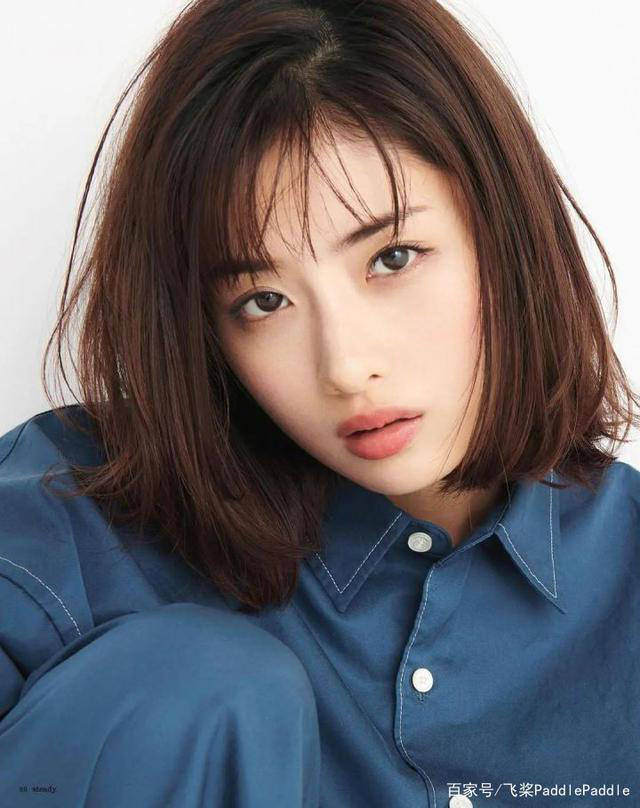

In [47]:
img_name='2.jpg'
src_img=Image.open('./img/'+img_name)
src_img

In [48]:
# 图片文件的目录
img =[r'D:\PycharmProjects\paddle_learn\01_img_seg\img\{}'.format(img_name)]
# 获取目录下的文件
#抠图
results = humanseg.segmentation(data={'image':img})
result=results[0]['data']
result


array([[  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ],
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ],
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ],
       ...,
       [250.53296, 251.13203, 251.73412, ..., 243.95035, 238.80434,
        232.91452],
       [250.41464, 251.07205, 251.72644, ..., 241.13216, 233.89981,
        225.44524],
       [250.3299 , 251.02916, 251.72092, ..., 239.0421 , 230.24525,
        219.86293]], dtype=float32)

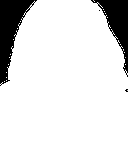

In [70]:
results[0]['data']
result_img=Image.fromarray(result,mode='I')
result_img.resize(tuple(map(lambda x:int(x/5), result.shape[::-1])))

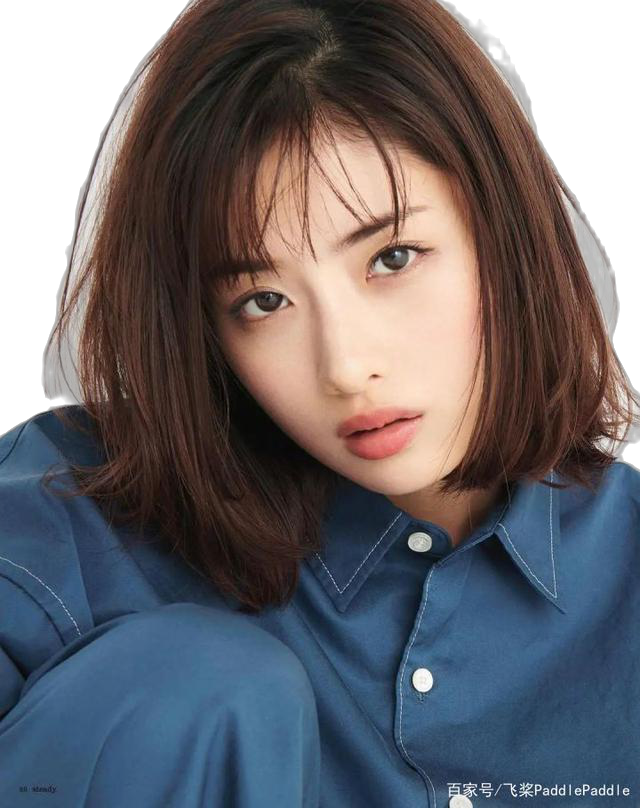

In [50]:
image_alpha = result.astype(np.uint8)
#这里我把背景换成了红色
img_bg = Image.new('RGBA', (np.array(src_img).shape[1], np.array(src_img).shape[0]), (0, 0, 0, 0)) #红色图
image_temp = src_img
img_bg.paste(image_temp, (0, 0), Image.fromarray(image_alpha))
img_bg
# path = "./new.png"
# img_bg.save(path)


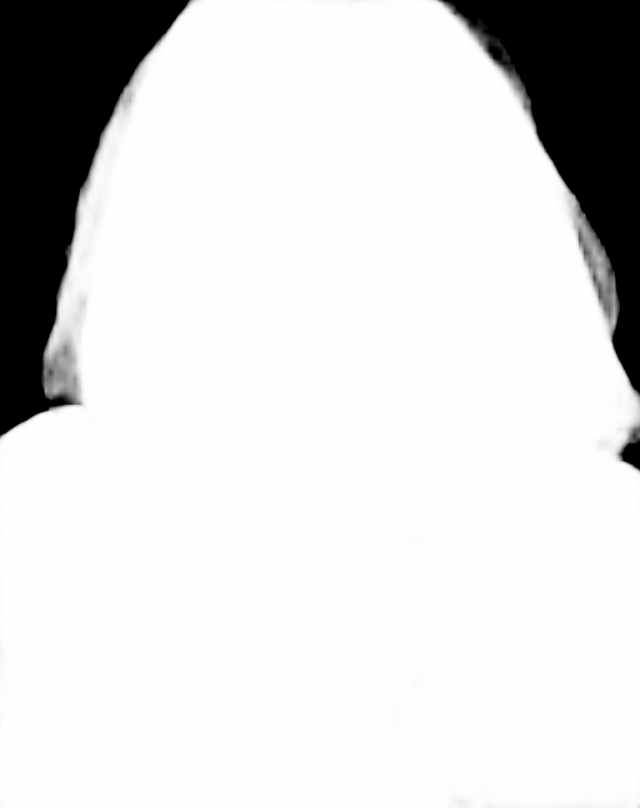

In [51]:
Image.fromarray(image_alpha)

C:\Users\zikep\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


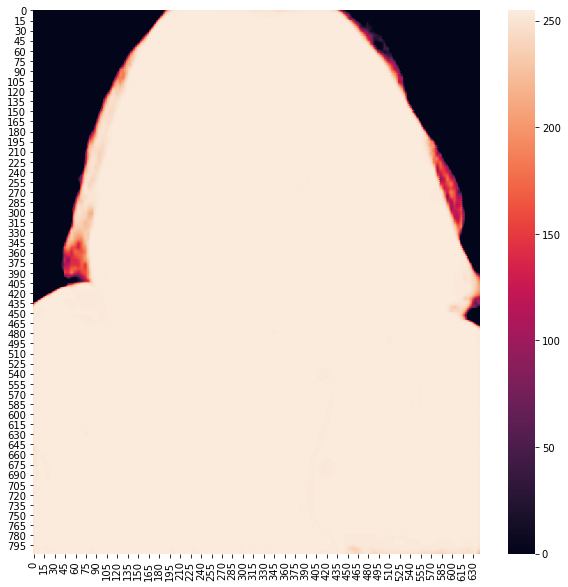

In [52]:
import seaborn as sns
import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(result)
# plt.savefig('1.png')
plt.show()


In [ ]:
# import numpy as np
# im = Image.open("zjz.jpg")
# # im.show() 
# img = np.array(im)      # image类 转 numpy
# img = img[:,:,0]        #第1通道
# img=Image.fromarray(img) # numpy 转 image类
# # im.show()
